### Training the Decision Tree Based Model

In [14]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
)

In [2]:
# Loading the preprocessed dataset

file_path = os.path.join(os.getcwd(), "Data", "processed", "FC110572_MethuliMenya","preprocessed_data.csv")
processed = pd.read_csv(file_path)

print(f"   Information of the processed dataset \n ===================================\n")
processed.info()

   Information of the processed dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27788 entries, 0 to 27787
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27788 non-null  object 
 1   Age                               27788 non-null  float64
 2   Academic Pressure                 27788 non-null  float64
 3   CGPA                              27788 non-null  float64
 4   Study Satisfaction                27788 non-null  float64
 5   Suicidal Thoughts                 27788 non-null  int64  
 6   Work/Study Hours                  27788 non-null  float64
 7   Financial Stress                  27788 non-null  float64
 8   Family History of Mental Illness  27788 non-null  int64  
 9   Depression                        27788 non-null  int64  
 10  SleepScore                        27788 non-null  int64  
 11  DietScore                

In [3]:
# Convert all object dDtype columns to categorical Dtype
for col in processed.select_dtypes(include='object').columns:
    processed[col] = processed[col].astype('category')

processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27788 entries, 0 to 27787
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Gender                            27788 non-null  category
 1   Age                               27788 non-null  float64 
 2   Academic Pressure                 27788 non-null  float64 
 3   CGPA                              27788 non-null  float64 
 4   Study Satisfaction                27788 non-null  float64 
 5   Suicidal Thoughts                 27788 non-null  int64   
 6   Work/Study Hours                  27788 non-null  float64 
 7   Financial Stress                  27788 non-null  float64 
 8   Family History of Mental Illness  27788 non-null  int64   
 9   Depression                        27788 non-null  int64   
 10  SleepScore                        27788 non-null  int64   
 11  DietScore                         27788 non-null  int6

#### 1. Splitting Data to Isolate test data

In [4]:
features = processed.columns.drop('Depression')
target = "Depression"

# Split the preprocessed data so, 85% data goes to train and the remaining 15% for the testing.
X_train_full, X_test, y_train_full, y_test = train_test_split(processed[features], processed[target], test_size=0.15, stratify=processed[target], random_state=123)

# Split the train data set into 85% as train data and 15% as validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, stratify=y_train_full, random_state=123)

In [5]:
train_depressed_pct = (y_train.value_counts(normalize=True)[1]) * 100
val_depressed_pct = (y_val.value_counts(normalize=True)[1]) * 100
test_depressed_pct = (y_test.value_counts(normalize=True)[1]) * 100

print(f"Depressed percentage in training set: {train_depressed_pct:.2f}%")
print(f"Depressed percentage in validation set: {val_depressed_pct:.2f}%")
print(f"Depressed percentage in test set: {test_depressed_pct:.2f}%")

Depressed percentage in training set: 58.58%
Depressed percentage in validation set: 58.57%
Depressed percentage in test set: 58.58%


#### 2. Label Encoding the Gender and Degree columns

In [6]:
# Label Encoders
le_degree = LabelEncoder()
le_gender = LabelEncoder()

# Fitting Encoders on training data
X_train['Degree_Cleaned'] = le_degree.fit_transform(X_train['Degree_Cleaned'])
X_train['Gender'] = le_gender.fit_transform(X_train['Gender'])

# Transform validation data sets
X_val['Degree_Cleaned'] = le_degree.transform(X_val['Degree_Cleaned'])
X_val['Gender'] = le_gender.transform(X_val['Gender'])

# Transform test data sets
X_test['Degree_Cleaned'] = le_degree.transform(X_test['Degree_Cleaned'])
X_test['Gender'] = le_gender.transform(X_test['Gender'])

#### 3. Baseline Model

In [11]:
dt_baseline = DecisionTreeClassifier(random_state=123)
dt_baseline.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
# Baseline model prediction on train dataset
y_train_predict_baseline = dt_baseline.predict(X_train)
# Predict probabilities of depressed class on train dataset
y_train_predict_baseline_proba = dt_baseline.predict_proba(X_train)[:, 1]

In [20]:
# Baseline model prediction on validation data set
y_val_predict_baseline = dt_baseline.predict(X_val)
# Predict probabilities of depressed class on validation dataset
y_val_predict_baseline_proba = dt_baseline.predict_proba(X_val)[:, 1]

In [23]:
# Reusable function to calculate and print evaluation metrics
def evaluate_model(y_true, y_pred, y_proba, dataSetName, modelName):
    print(f"\n=={dataSetName} Performance ({modelName})==")
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision      : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score       : {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score  : {roc_auc_score(y_true, y_proba):.4f}")

In [27]:
#Evaluation of baseline model based on  train and validation sets

evaluate_model(y_train, y_train_predict_baseline, y_train_predict_baseline_proba, 'Train Set', 'Baseline')
evaluate_model(y_val, y_val_predict_baseline, y_val_predict_baseline_proba, 'Validation Set', 'Baseline')


==Train Set Performance (Baseline)==
Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1 Score       : 1.0000
ROC AUC Score  : 1.0000

==Validation Set Performance (Baseline)==
Accuracy       : 0.7722
Precision      : 0.8051
Recall         : 0.8063
F1 Score       : 0.8057
ROC AUC Score  : 0.7652


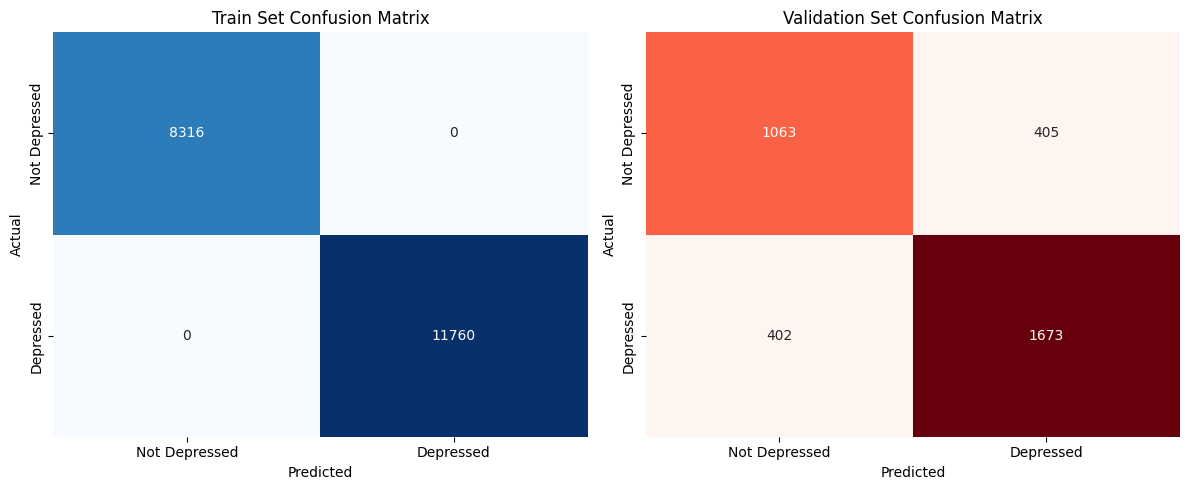

In [31]:
cm_train = confusion_matrix(y_train, y_train_predict_baseline)
cm_val = confusion_matrix(y_val, y_val_predict_baseline)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'], ax=axes[0])
axes[0].set_title("Train Set Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Validation set 
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'], ax=axes[1])
axes[1].set_title("Validation Set Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()